In [1]:
from solver import BE_solver, energy_conservation
from CollisionOperators import collisions_ann, collisions_sca

import numpy as np
import matplotlib.pyplot as plt

Generating data from the Boltzmann Equation solver 

In [2]:
# elastic scattering
elastic_scattering_J_zero = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=50,J=0,interaction_strength=1,collision_type="elastic scattering")
elastic_scattering_J_one  = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=50,J=1,interaction_strength=1,collision_type="elastic scattering")


# annihilation (it doesn't matter what J is - it can be either)
annihilation = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=50,J=0,interaction_strength=1,collision_type="annihilation")

# annihilation and elastic scattering
both_data_J_zero = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=50,J=0,interaction_strength=1,collision_type="both")
both_data_J_one  = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=50,J=1,interaction_strength=1,collision_type="both")

Solved BE for (type=elastic scattering,# y-steps=50)
Solved BE for (type=elastic scattering,# y-steps=50)
Solved BE for (type=annihilation,# y-steps=50)
Solved BE for (type=both,# y-steps=50)
Solved BE for (type=both,# y-steps=50)


Formating data from the Botzmann Equation solver

In [3]:
# elastic scattering
xs_elastic_scattering_zero = elastic_scattering_J_zero[0]
xs_elastic_scattering_one  = elastic_scattering_J_one[0]

fs_elastic_scattering_zero = elastic_scattering_J_zero[1]
fs_elastic_scattering_one = elastic_scattering_J_one[1]

ys_elastic_scattering_zero = elastic_scattering_J_zero[2]
ys_elastic_scattering_one = elastic_scattering_J_one[2]


# annihilation
xs_annihilation = annihilation[0]

fs_annihilation = annihilation[1]

ys_annihilation = annihilation[2]


# annihilation and elastic scattering
xs_both_J_zero = both_data_J_zero[0]
xs_both_J_one = both_data_J_one[0]

fs_both_J_zero = both_data_J_zero[1]
fs_both_J_one = both_data_J_one[1]

ys_both_J_zero = both_data_J_zero[2]
ys_both_J_one = both_data_J_one[2]


In [4]:
# compute the value of the elastic scattering operator
c_sca = []
c_ann = []



c_sca.append([collisions_sca(fs_elastic_scattering_zero[:,k],ys_elastic_scattering_zero,x)[10] for k,x in enumerate(xs_elastic_scattering_zero)])
c_ann.append([collisions_ann(fs_elastic_scattering_zero[:,k],ys_elastic_scattering_zero,x,J=0)[10] for k,x in enumerate(xs_elastic_scattering_zero)])
# print("collision scattering term  :",np.array(c_sca))
# print("collision annihilation term:",np.array(c_sca))

In [5]:
# compute the energy conservation indicators and plot them for larger and larger bins
bins = [10,20,30,40,50,60,70,80,90,100]

# xs = []
# fs = []
# ys = []

# for bin in bins:
#     elastic_scattering = BE_solver(x_span=(0.01,50),y_span=(0.01,20),y_steps=20,J=0,interaction_strength=1,collision_type="elastic scattering")
#     xs.append(elastic_scattering[0])
#     fs.append(elastic_scattering[1])
#     ys.append(elastic_scattering[2])

# compute energy conservation
# n_dot = [energy_conservation(xs[i],ys[i],fs[i],J=0)[0][10] for i in range(len(bins))]

Plotting the results from the Boltzmann equation solver

Text(0.5, 1.0, 'Distribution for elastic scattering when J = 1 for differeny y=p/T')

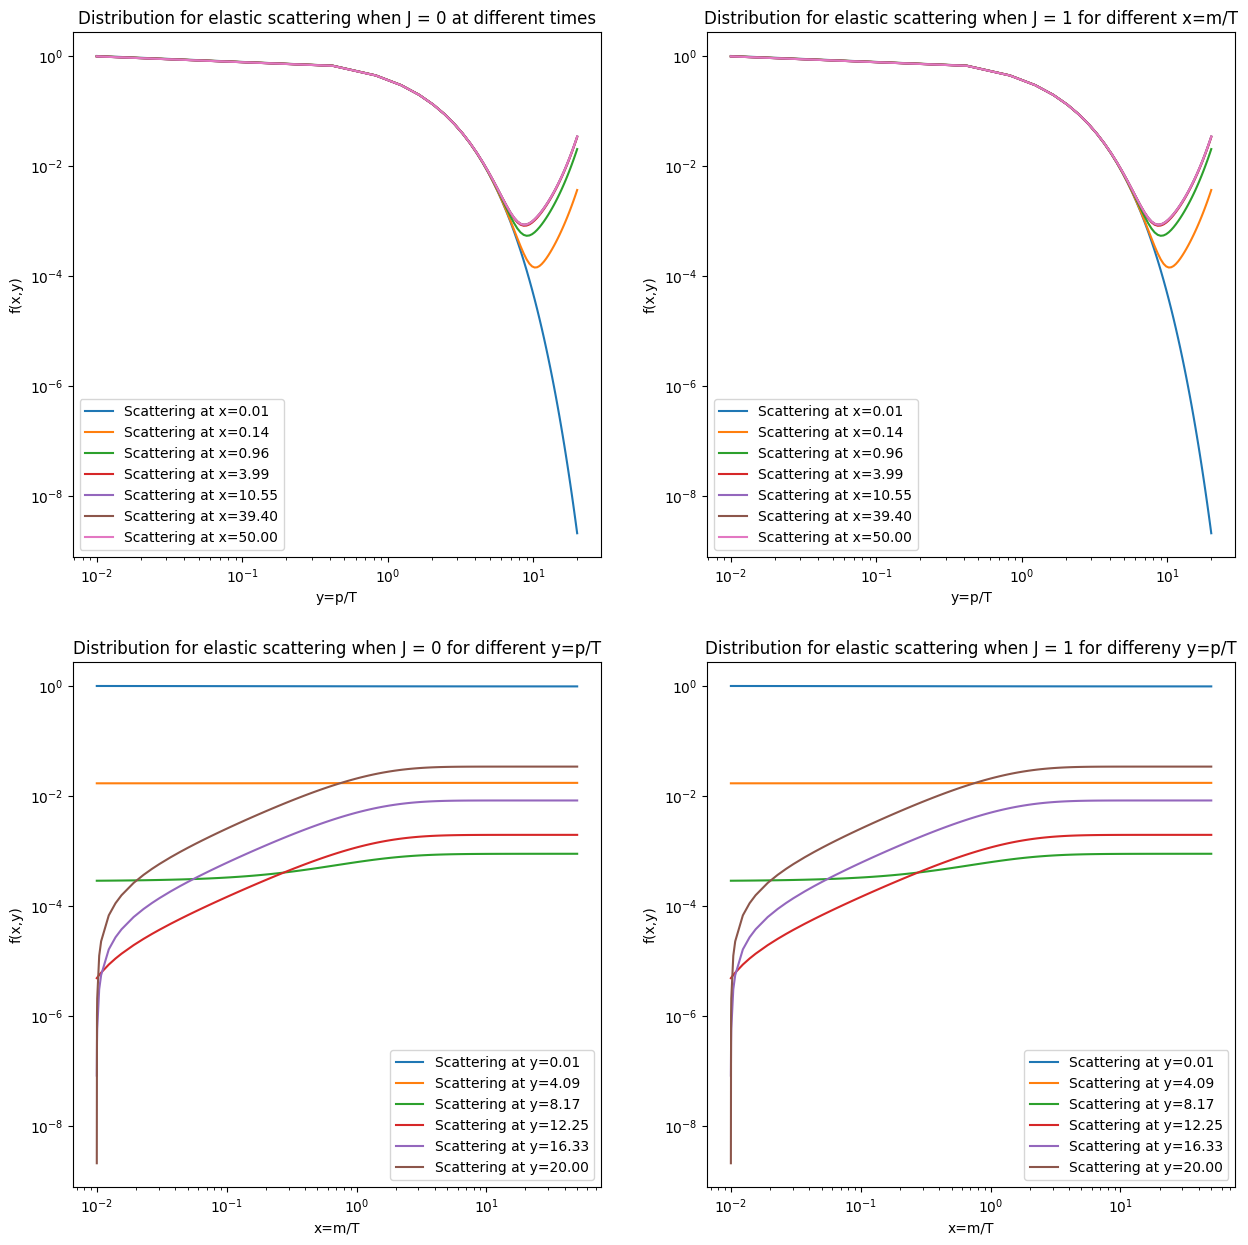

In [6]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))

# number of plots
N = 0.2 

# Plotting elastic scattering, J = 0 at different times
x = ys_elastic_scattering_zero
for k in range(0,len(xs_elastic_scattering_zero),int(len(xs_elastic_scattering_zero)*N)):
    y = [fs_elastic_scattering_zero[i][k] for i in range(len(ys_elastic_scattering_zero))]
    ax[0,0].loglog(x,y,label=f"Scattering at x={xs_elastic_scattering_zero[k]:.02f}")
y = [fs_elastic_scattering_zero[i][-1] for i in range(len(ys_elastic_scattering_zero))]
ax[0,0].loglog(x,y,label=f"Scattering at x={xs_elastic_scattering_zero[-1]:.02f}")

ax[0,0].legend()
ax[0,0].set_xlabel("y=p/T")
ax[0,0].set_ylabel("f(x,y)")
ax[0,0].set_title("Distribution for elastic scattering when J = 0 at different times")


x = ys_elastic_scattering_one
for k in range(0,len(xs_elastic_scattering_one),int(len(xs_elastic_scattering_one)*N)):
    y = [fs_elastic_scattering_one[i][k] for i in range(len(ys_elastic_scattering_one))]
    ax[0,1].loglog(x,y,label=f"Scattering at x={xs_elastic_scattering_one[k]:.02f}")
y = [fs_elastic_scattering_one[i][-1] for i in range(len(ys_elastic_scattering_one))]
ax[0,1].loglog(x,y,label=f"Scattering at x={xs_elastic_scattering_one[-1]:.02f}")

ax[0,1].legend()
ax[0,1].set_xlabel("y=p/T")
ax[0,1].set_ylabel("f(x,y)")
ax[0,1].set_title("Distribution for elastic scattering when J = 1 for different x=m/T")


x = xs_elastic_scattering_zero
for k in range(0,len(ys_elastic_scattering_zero),int(len(ys_elastic_scattering_zero)*N)):
    y = [fs_elastic_scattering_zero[k][i] for i in range(len(xs_elastic_scattering_zero))]
    ax[1,0].loglog(x,y,label=f"Scattering at y={ys_elastic_scattering_zero[k]:.02f}")
y = [fs_elastic_scattering_zero[-1][i] for i in range(len(xs_elastic_scattering_zero))]
ax[1,0].loglog(x,y,label=f"Scattering at y={ys_elastic_scattering_zero[-1]:.02f}")

ax[1,0].legend()
ax[1,0].set_xlabel("x=m/T")
ax[1,0].set_ylabel("f(x,y)")
ax[1,0].set_title("Distribution for elastic scattering when J = 0 for different y=p/T")


x = xs_elastic_scattering_one
for k in range(0,len(ys_elastic_scattering_one),int(len(ys_elastic_scattering_one)*N)):
    y = [fs_elastic_scattering_one[k][i] for i in range(len(xs_elastic_scattering_one))]
    ax[1,1].loglog(x,y,label=f"Scattering at y={ys_elastic_scattering_one[k]:.02f}")
y = [fs_elastic_scattering_one[-1][i] for i in range(len(xs_elastic_scattering_one))]
ax[1,1].loglog(x,y,label=f"Scattering at y={ys_elastic_scattering_one[-1]:.02f}")

ax[1,1].legend()
ax[1,1].set_xlabel("x=m/T")
ax[1,1].set_ylabel("f(x,y)")
ax[1,1].set_title("Distribution for elastic scattering when J = 1 for differeny y=p/T")

In [7]:
# Plot scattering distribution function and p^2 * f when we start with a random distribution
def random_distribution(y,x):
    return 0.5

scattering_random_distribution = BE_solver(x_span=(0.01,50),y_span=(0.01,50),y_steps=50,J=0,interaction_strength=1,collision_type="elastic scattering",initial_condition=random_distribution)

Solved BE for (type=elastic scattering,# y-steps=50)


In [8]:
# format data
xs_random_dist = scattering_random_distribution[0]
fs_random_dist = scattering_random_distribution[1]
ys_random_dist = scattering_random_distribution[2]

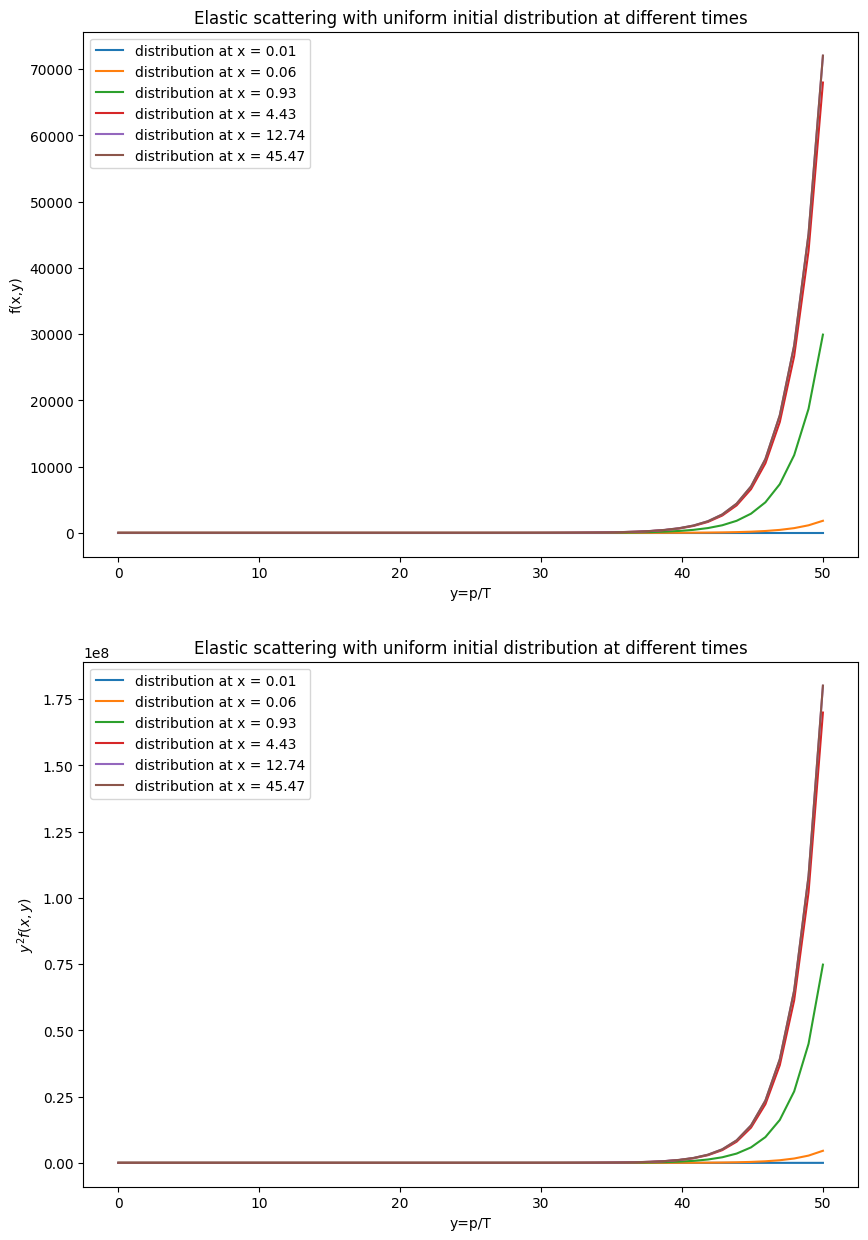

In [9]:
fig, axs = plt.subplots(2,figsize=(10,15))

N = 0.2

for k in range(0,len(xs_random_dist),int(len(xs_random_dist)*N)):
    x = ys_random_dist
    y = [fs_random_dist[i][k] for i in range(len(ys_random_dist))]
    axs[0].plot(x,y,label=f"distribution at x = {xs_random_dist[k]:0.2f}")

axs[0].set_xlabel("y=p/T")
axs[0].set_ylabel("f(x,y)")
axs[0].set_title("Elastic scattering with uniform initial distribution at different times")
axs[0].legend()

for k in range(0,len(xs_random_dist),int(len(xs_random_dist)*N)):
    x = ys_random_dist
    y = [ys_random_dist[i]**2 * fs_random_dist[i][k] for i in range(len(ys_random_dist))]
    axs[1].plot(x,y,label=f"distribution at x = {xs_random_dist[k]:.02f}")

axs[1].set_xlabel("y=p/T")
axs[1].set_ylabel(r"$y^2 f(x,y)$")
axs[1].set_title("Elastic scattering with uniform initial distribution at different times")
axs[1].legend()